In [1]:
regions = [

    #Canada – City Regions
    {"name": "Greater Toronto Area", "latitude": 43.6532, "longitude": -79.3832},
    {"name": "Montreal CMA", "latitude": 45.5017, "longitude": -73.5673},
    {"name": "Calgary Metro Region", "latitude": 51.0447, "longitude": -114.0719},
    {"name": "Vancouver Region", "latitude": 49.2827, "longitude": -123.1207},
    {"name": "Edmonton Metro Region", "latitude": 53.5461, "longitude": -113.4938},
    {"name": "Winnipeg Region", "latitude": 49.8951, "longitude": -97.1384},

    #Canada – Provinces
    {"name": "Alberta", "latitude": 53.9333, "longitude": -116.5765},
    {"name": "British Columbia", "latitude": 53.7267, "longitude": -127.6476},
    {"name": "Manitoba", "latitude": 55.0000, "longitude": -97.0000},
    {"name": "Ontario", "latitude": 50.0000, "longitude": -85.0000},
    {"name": "Quebec", "latitude": 52.0000, "longitude": -71.7500},
    {"name": "Saskatchewan", "latitude": 54.0000, "longitude": -106.0000},
    {"name": "Nova Scotia", "latitude": 45.0000, "longitude": -62.9981},

    #India – Punjab Region Focus
    {"name": "Punjab", "latitude": 31.1471, "longitude": 75.3412},
    {"name": "Ludhiana Region", "latitude": 30.9000, "longitude": 75.8573},
    {"name": "Amritsar Region", "latitude": 31.6340, "longitude": 74.8723},
    {"name": "Patiala Region", "latitude": 30.3398, "longitude": 76.3869},
    {"name": "Bathinda Region", "latitude": 30.2110, "longitude": 74.9455},
    {"name": "Gurdaspur Region", "latitude": 32.0419, "longitude": 75.4088},

    #India – Additional States from dataset
    {"name": "Andhra Pradesh", "latitude": 15.9129, "longitude": 79.7400},
    {"name": "Bihar", "latitude": 25.0961, "longitude": 85.3131},
    {"name": "Gujarat", "latitude": 22.2587, "longitude": 71.1924},
    {"name": "Haryana", "latitude": 29.0588, "longitude": 76.0856},
    {"name": "Karnataka", "latitude": 15.3173, "longitude": 75.7139},
    {"name": "Maharashtra", "latitude": 19.7515, "longitude": 75.7139},
    {"name": "Madhya Pradesh", "latitude": 22.9734, "longitude": 78.6569},
    {"name": "Rajasthan", "latitude": 27.0238, "longitude": 74.2179},
    {"name": "Tamil Nadu", "latitude": 11.1271, "longitude": 78.6569},
    {"name": "Uttar Pradesh", "latitude": 26.8467, "longitude": 80.9462},
    {"name": "West Bengal", "latitude": 22.9868, "longitude": 87.8550}
]


In [3]:
import openmeteo_requests
import pandas as pd
import requests_cache
from retry_requests import retry

#set up Open-Meteo client with caching and retry
cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

#api endpoint
url = "https://customer-archive-api.open-meteo.com/v1/archive"

all_data = []

#loop through each region
for region in regions:
    print(f"Fetching data for {region['name']}...")

    params = {
        "latitude": region["latitude"],
        "longitude": region["longitude"],
        "start_date": "2024-12-01",
        "end_date": "2025-06-22",
        "daily": [
            "weather_code", "temperature_2m_mean", "temperature_2m_max", "temperature_2m_min",
            "apparent_temperature_mean", "apparent_temperature_max", "apparent_temperature_min",
            "sunrise", "sunset", "daylight_duration", "sunshine_duration", "precipitation_sum",
            "rain_sum", "snowfall_sum", "precipitation_hours", "wind_speed_10m_max",
            "wind_gusts_10m_max", "wind_direction_10m_dominant", "shortwave_radiation_sum",
            "et0_fao_evapotranspiration", "cloud_cover_mean", "cloud_cover_max",
            "cloud_cover_min", "dew_point_2m_mean", "dew_point_2m_max", "dew_point_2m_min",
            "et0_fao_evapotranspiration_sum", "growing_degree_days_base_0_limit_50",
            "leaf_wetness_probability_mean", "precipitation_probability_mean",
            "precipitation_probability_min", "relative_humidity_2m_mean",
            "relative_humidity_2m_max", "relative_humidity_2m_min",
            "snowfall_water_equivalent_sum", "pressure_msl_mean", "pressure_msl_max",
            "pressure_msl_min", "wind_speed_10m_min", "wind_gusts_10m_min",
            "wind_speed_10m_mean", "wind_gusts_10m_mean", "winddirection_10m_dominant",
            "visibility_max", "visibility_min", "visibility_mean", "updraft_max",
            "surface_pressure_min", "surface_pressure_max", "surface_pressure_mean",
            "soil_moisture_0_to_100cm_mean", "soil_moisture_0_to_10cm_mean",
            "soil_moisture_0_to_7cm_mean", "soil_moisture_28_to_100cm_mean",
            "soil_moisture_7_to_28cm_mean", "soil_temperature_0_to_100cm_mean",
            "soil_temperature_0_to_7cm_mean", "soil_temperature_28_to_100cm_mean",
            "soil_temperature_7_to_28cm_mean", "vapour_pressure_deficit_max",
            "wet_bulb_temperature_2m_min", "wet_bulb_temperature_2m_max",
            "wet_bulb_temperature_2m_mean"
        ],
        "temperature_unit": "fahrenheit",
        "wind_speed_unit": "mph",
        "apikey": ""
    }

    responses = openmeteo.weather_api(url, params=params)
    response = responses[0]

    #grab the daily weather data
    daily = response.Daily()
    daily_weather_code = daily.Variables(0).ValuesAsNumpy()
    daily_temperature_2m_mean = daily.Variables(1).ValuesAsNumpy()
    daily_temperature_2m_max = daily.Variables(2).ValuesAsNumpy()
    daily_temperature_2m_min = daily.Variables(3).ValuesAsNumpy()
    daily_apparent_temperature_mean = daily.Variables(4).ValuesAsNumpy()
    daily_apparent_temperature_max = daily.Variables(5).ValuesAsNumpy()
    daily_apparent_temperature_min = daily.Variables(6).ValuesAsNumpy()
    daily_sunrise = daily.Variables(7).ValuesInt64AsNumpy()
    daily_sunset = daily.Variables(8).ValuesInt64AsNumpy()
    daily_daylight_duration = daily.Variables(9).ValuesAsNumpy()
    daily_sunshine_duration = daily.Variables(10).ValuesAsNumpy()
    daily_precipitation_sum = daily.Variables(11).ValuesAsNumpy()
    daily_rain_sum = daily.Variables(12).ValuesAsNumpy()
    daily_snowfall_sum = daily.Variables(13).ValuesAsNumpy()
    daily_precipitation_hours = daily.Variables(14).ValuesAsNumpy()
    daily_wind_speed_10m_max = daily.Variables(15).ValuesAsNumpy()
    daily_wind_gusts_10m_max = daily.Variables(16).ValuesAsNumpy()
    daily_wind_direction_10m_dominant = daily.Variables(17).ValuesAsNumpy()
    daily_shortwave_radiation_sum = daily.Variables(18).ValuesAsNumpy()
    daily_et0_fao_evapotranspiration = daily.Variables(19).ValuesAsNumpy()
    daily_cloud_cover_mean = daily.Variables(20).ValuesAsNumpy()
    daily_cloud_cover_max = daily.Variables(21).ValuesAsNumpy()
    daily_cloud_cover_min = daily.Variables(22).ValuesAsNumpy()
    daily_dew_point_2m_mean = daily.Variables(23).ValuesAsNumpy()
    daily_dew_point_2m_max = daily.Variables(24).ValuesAsNumpy()
    daily_dew_point_2m_min = daily.Variables(25).ValuesAsNumpy()
    daily_et0_fao_evapotranspiration_sum = daily.Variables(26).ValuesAsNumpy()
    daily_growing_degree_days_base_0_limit_50 = daily.Variables(27).ValuesAsNumpy()
    daily_leaf_wetness_probability_mean = daily.Variables(28).ValuesAsNumpy()
    daily_precipitation_probability_mean = daily.Variables(29).ValuesAsNumpy()
    daily_precipitation_probability_min = daily.Variables(30).ValuesAsNumpy()
    daily_relative_humidity_2m_mean = daily.Variables(31).ValuesAsNumpy()
    daily_relative_humidity_2m_max = daily.Variables(32).ValuesAsNumpy()
    daily_relative_humidity_2m_min = daily.Variables(33).ValuesAsNumpy()
    daily_snowfall_water_equivalent_sum = daily.Variables(34).ValuesAsNumpy()
    daily_pressure_msl_mean = daily.Variables(35).ValuesAsNumpy()
    daily_pressure_msl_max = daily.Variables(36).ValuesAsNumpy()
    daily_pressure_msl_min = daily.Variables(37).ValuesAsNumpy()
    daily_wind_speed_10m_min = daily.Variables(38).ValuesAsNumpy()
    daily_wind_gusts_10m_min = daily.Variables(39).ValuesAsNumpy()
    daily_wind_speed_10m_mean = daily.Variables(40).ValuesAsNumpy()
    daily_wind_gusts_10m_mean = daily.Variables(41).ValuesAsNumpy()
    daily_winddirection_10m_dominant = daily.Variables(42).ValuesAsNumpy()
    daily_visibility_max = daily.Variables(43).ValuesAsNumpy()
    daily_visibility_min = daily.Variables(44).ValuesAsNumpy()
    daily_visibility_mean = daily.Variables(45).ValuesAsNumpy()
    daily_updraft_max = daily.Variables(46).ValuesAsNumpy()
    daily_surface_pressure_min = daily.Variables(47).ValuesAsNumpy()
    daily_surface_pressure_max = daily.Variables(48).ValuesAsNumpy()
    daily_surface_pressure_mean = daily.Variables(49).ValuesAsNumpy()
    daily_soil_moisture_0_to_100cm_mean = daily.Variables(50).ValuesAsNumpy()
    daily_soil_moisture_0_to_10cm_mean = daily.Variables(51).ValuesAsNumpy()
    daily_soil_moisture_0_to_7cm_mean = daily.Variables(52).ValuesAsNumpy()
    daily_soil_moisture_28_to_100cm_mean = daily.Variables(53).ValuesAsNumpy()
    daily_soil_moisture_7_to_28cm_mean = daily.Variables(54).ValuesAsNumpy()
    daily_soil_temperature_0_to_100cm_mean = daily.Variables(55).ValuesAsNumpy()
    daily_soil_temperature_0_to_7cm_mean = daily.Variables(56).ValuesAsNumpy()
    daily_soil_temperature_28_to_100cm_mean = daily.Variables(57).ValuesAsNumpy()
    daily_soil_temperature_7_to_28cm_mean = daily.Variables(58).ValuesAsNumpy()
    daily_vapour_pressure_deficit_max = daily.Variables(59).ValuesAsNumpy()
    daily_wet_bulb_temperature_2m_min = daily.Variables(60).ValuesAsNumpy()
    daily_wet_bulb_temperature_2m_max = daily.Variables(61).ValuesAsNumpy()
    daily_wet_bulb_temperature_2m_mean = daily.Variables(62).ValuesAsNumpy()

    daily_data = {
        "date": pd.date_range(
            start=pd.to_datetime(daily.Time(), unit="s", utc=True),
            end=pd.to_datetime(daily.TimeEnd(), unit="s", utc=True),
            freq=pd.Timedelta(seconds=daily.Interval()),
            inclusive="left"
        ),
        "region": region["name"],
        "weather_code": daily_weather_code,
        "temperature_2m_mean": daily_temperature_2m_mean,
        "temperature_2m_max": daily_temperature_2m_max,
        "temperature_2m_min": daily_temperature_2m_min,
        "apparent_temperature_mean": daily_apparent_temperature_mean,
        "apparent_temperature_max": daily_apparent_temperature_max,
        "apparent_temperature_min": daily_apparent_temperature_min,
        "sunrise": daily_sunrise,
        "sunset": daily_sunset,
        "daylight_duration": daily_daylight_duration,
        "sunshine_duration": daily_sunshine_duration,
        "precipitation_sum": daily_precipitation_sum,
        "rain_sum": daily_rain_sum,
        "snowfall_sum": daily_snowfall_sum,
        "precipitation_hours": daily_precipitation_hours,
        "wind_speed_10m_max": daily_wind_speed_10m_max,
        "wind_gusts_10m_max": daily_wind_gusts_10m_max,
        "wind_direction_10m_dominant": daily_wind_direction_10m_dominant,
        "shortwave_radiation_sum": daily_shortwave_radiation_sum,
        "et0_fao_evapotranspiration": daily_et0_fao_evapotranspiration,
        "cloud_cover_mean": daily_cloud_cover_mean,
        "cloud_cover_max": daily_cloud_cover_max,
        "cloud_cover_min": daily_cloud_cover_min,
        "dew_point_2m_mean": daily_dew_point_2m_mean,
        "dew_point_2m_max": daily_dew_point_2m_max,
        "dew_point_2m_min": daily_dew_point_2m_min,
        "et0_fao_evapotranspiration_sum": daily_et0_fao_evapotranspiration_sum,
        "growing_degree_days_base_0_limit_50": daily_growing_degree_days_base_0_limit_50,
        "leaf_wetness_probability_mean": daily_leaf_wetness_probability_mean,
        "precipitation_probability_mean": daily_precipitation_probability_mean,
        "precipitation_probability_min": daily_precipitation_probability_min,
        "relative_humidity_2m_mean": daily_relative_humidity_2m_mean,
        "relative_humidity_2m_max": daily_relative_humidity_2m_max,
        "relative_humidity_2m_min": daily_relative_humidity_2m_min,
        "snowfall_water_equivalent_sum": daily_snowfall_water_equivalent_sum,
        "pressure_msl_mean": daily_pressure_msl_mean,
        "pressure_msl_max": daily_pressure_msl_max,
        "pressure_msl_min": daily_pressure_msl_min,
        "wind_speed_10m_min": daily_wind_speed_10m_min,
        "wind_gusts_10m_min": daily_wind_gusts_10m_min,
        "wind_speed_10m_mean": daily_wind_speed_10m_mean,
        "wind_gusts_10m_mean": daily_wind_gusts_10m_mean,
        "winddirection_10m_dominant": daily_winddirection_10m_dominant,
        "visibility_max": daily_visibility_max,
        "visibility_min": daily_visibility_min,
        "visibility_mean": daily_visibility_mean,
        "updraft_max": daily_updraft_max,
        "surface_pressure_min": daily_surface_pressure_min,
        "surface_pressure_max": daily_surface_pressure_max,
        "surface_pressure_mean": daily_surface_pressure_mean,
        "soil_moisture_0_to_100cm_mean": daily_soil_moisture_0_to_100cm_mean,
        "soil_moisture_0_to_10cm_mean": daily_soil_moisture_0_to_10cm_mean,
        "soil_moisture_0_to_7cm_mean": daily_soil_moisture_0_to_7cm_mean,
        "soil_moisture_28_to_100cm_mean": daily_soil_moisture_28_to_100cm_mean,
        "soil_moisture_7_to_28cm_mean": daily_soil_moisture_7_to_28cm_mean,
        "soil_temperature_0_to_100cm_mean": daily_soil_temperature_0_to_100cm_mean,
        "soil_temperature_0_to_7cm_mean": daily_soil_temperature_0_to_7cm_mean,
        "soil_temperature_28_to_100cm_mean": daily_soil_temperature_28_to_100cm_mean,
        "soil_temperature_7_to_28cm_mean": daily_soil_temperature_7_to_28cm_mean,
        "vapour_pressure_deficit_max": daily_vapour_pressure_deficit_max,
        "wet_bulb_temperature_2m_min": daily_wet_bulb_temperature_2m_min,
        "wet_bulb_temperature_2m_max": daily_wet_bulb_temperature_2m_max,
        "wet_bulb_temperature_2m_mean": daily_wet_bulb_temperature_2m_mean
    }

    daily_df = pd.DataFrame(data=daily_data)
    all_data.append(daily_df)

#put everything into one big dataframe and save
final_df = pd.concat(all_data, ignore_index=True)
final_df.to_csv("weather_daily_regions.csv", index=False)
print(final_df.head())


Fetching data for Greater Toronto Area...
Fetching data for Montreal CMA...
Fetching data for Calgary Metro Region...
Fetching data for Vancouver Region...
Fetching data for Edmonton Metro Region...
Fetching data for Winnipeg Region...
Fetching data for Alberta...
Fetching data for British Columbia...
Fetching data for Manitoba...
Fetching data for Ontario...
Fetching data for Quebec...
Fetching data for Saskatchewan...
Fetching data for Nova Scotia...
Fetching data for Punjab...
Fetching data for Ludhiana Region...
Fetching data for Amritsar Region...
Fetching data for Patiala Region...
Fetching data for Bathinda Region...
Fetching data for Gurdaspur Region...
Fetching data for Andhra Pradesh...
Fetching data for Bihar...
Fetching data for Gujarat...
Fetching data for Haryana...
Fetching data for Karnataka...
Fetching data for Maharashtra...
Fetching data for Madhya Pradesh...
Fetching data for Rajasthan...
Fetching data for Tamil Nadu...
Fetching data for Uttar Pradesh...
Fetching da

In [4]:
#basic overview of columns and types
print(final_df.info())
print()

#summary statistics for all numeric fields
print(final_df.describe())
print()

#how many regions and how much time coverage we have
print("unique regions:", final_df['region'].nunique())
print("date range:", final_df['date'].min(), "to", final_df['date'].max())
print("total records:", len(final_df))
print()

#check if any columns have missing values
missing = final_df.isnull().sum()
print("missing values:")
print(missing[missing > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 65 columns):
 #   Column                               Non-Null Count  Dtype              
---  ------                               --------------  -----              
 0   date                                 6120 non-null   datetime64[ns, UTC]
 1   region                               6120 non-null   object             
 2   weather_code                         6120 non-null   float32            
 3   temperature_2m_mean                  6120 non-null   float32            
 4   temperature_2m_max                   6120 non-null   float32            
 5   temperature_2m_min                   6120 non-null   float32            
 6   apparent_temperature_mean            6120 non-null   float32            
 7   apparent_temperature_max             6120 non-null   float32            
 8   apparent_temperature_min             6120 non-null   float32            
 9   sunrise                       

In [ ]:
# load agri datasets
india_agri = pd.read_csv("India Agriculture Crop Production.csv")
canada_regional = pd.read_csv("canada_regional.csv")
canada_states = pd.read_csv("canada_states.csv")


In [8]:

# quick summary for india agriculture data
print("india agriculture dataset:")
print(india_agri.describe(include='all'))
print()



india agriculture dataset:
                State  District    Crop     Year  Season          Area  \
count          345407    345407  345375   345407  345406  3.453740e+05   
unique             36       729      56       24       6           NaN   
top     Uttar Pradesh  BILASPUR    Rice  2019-20  Kharif           NaN   
freq            44781      1244   21611    19296  138400           NaN   
mean              NaN       NaN     NaN      NaN     NaN  1.167019e+04   
std               NaN       NaN     NaN      NaN     NaN  4.583843e+04   
min               NaN       NaN     NaN      NaN     NaN  4.000000e-03   
25%               NaN       NaN     NaN      NaN     NaN  7.400000e+01   
50%               NaN       NaN     NaN      NaN     NaN  5.320000e+02   
75%               NaN       NaN     NaN      NaN     NaN  4.110000e+03   
max               NaN       NaN     NaN      NaN     NaN  8.580100e+06   

       Area Units    Production Production Units          Yield  
count      345407 

In [9]:
# quick summary for canada regional data
print("canada regional dataset:")
print(canada_regional.describe(include='all'))
print()


canada regional dataset:
             REF_DATE           GEO        DGUID  Harvest disposition  \
count   342326.000000        342326        26256               342326   
unique            NaN            81            6                   10   
top               NaN  Saskatchewan  2021A000247  Seeded area (acres)   
freq              NaN          7178         7178                44043   
mean      2000.485771           NaN          NaN                  NaN   
std         14.039263           NaN          NaN                  NaN   
min       1976.000000           NaN          NaN                  NaN   
25%       1988.000000           NaN          NaN                  NaN   
50%       2001.000000           NaN          NaN                  NaN   
75%       2013.000000           NaN          NaN                  NaN   
max       2024.000000           NaN          NaN                  NaN   

       Type of crop     UOM         UOM_ID SCALAR_FACTOR      SCALAR_ID  \
count        342326  34

In [10]:
# quick summary for canada state-level data
print("canada state dataset:")
print(canada_states.describe(include='all'))
print()

canada state dataset:
             REF_DATE     GEO           DGUID     Harvest disposition  \
count   386929.000000  386929          325538                  386929   
unique            NaN      15              12                      20   
top               NaN  Canada  2021A000011124  Seeded area (hectares)   
freq              NaN   42919           42919                   49040   
mean      1965.750686     NaN             NaN                     NaN   
std         33.951660     NaN             NaN                     NaN   
min       1908.000000     NaN             NaN                     NaN   
25%       1936.000000     NaN             NaN                     NaN   
50%       1965.000000     NaN             NaN                     NaN   
75%       1995.000000     NaN             NaN                     NaN   
max       2025.000000     NaN             NaN                     NaN   

       Type of crop       UOM         UOM_ID SCALAR_FACTOR      SCALAR_ID  \
count        386929    3

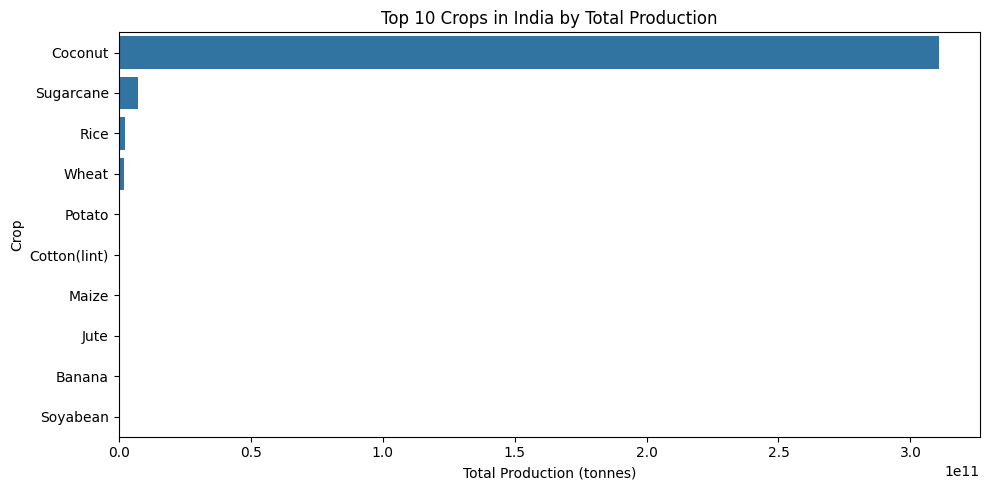

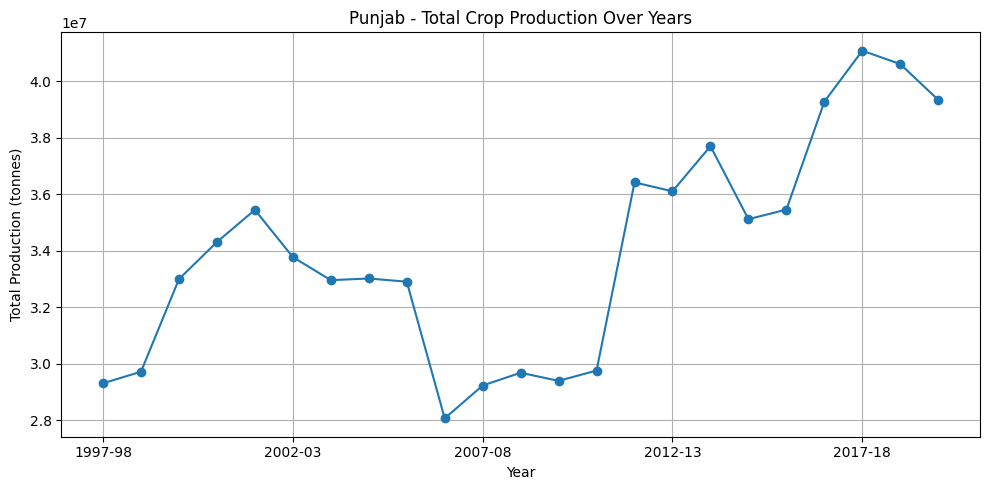

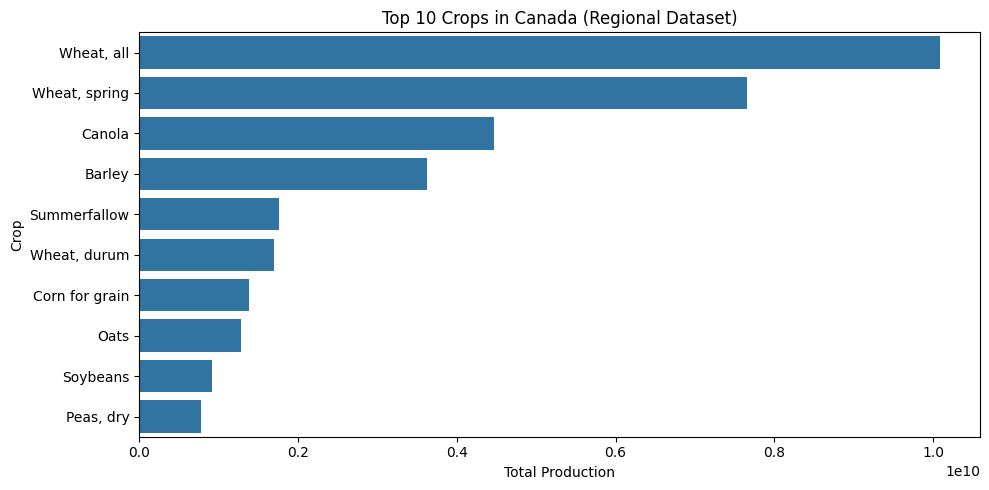

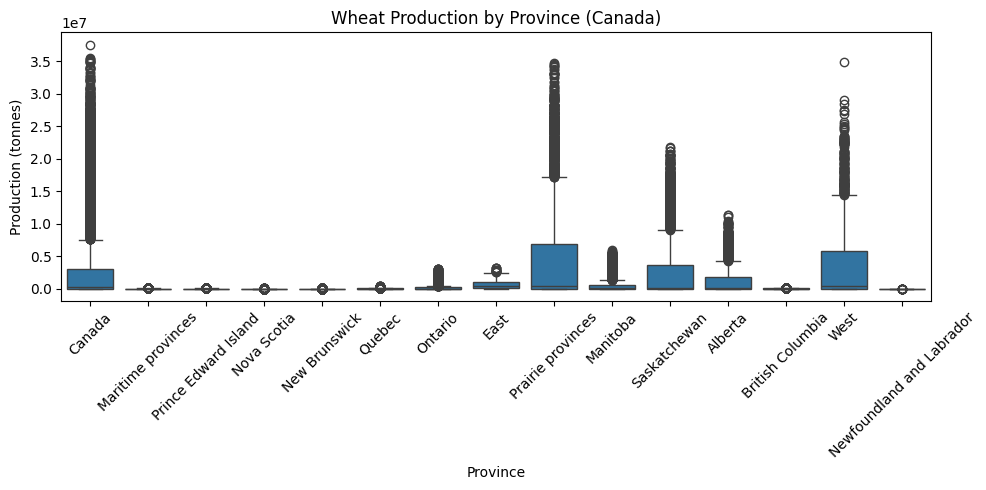

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
#top crops in india by total production
top_crops_india = india_agri.groupby("Crop")["Production"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_crops_india.values, y=top_crops_india.index)
plt.title("Top 10 Crops in India by Total Production")
plt.xlabel("Total Production (tonnes)")
plt.ylabel("Crop")
plt.tight_layout()
plt.show()

#punjab yearly production trend
punjab_data = india_agri[india_agri["State"].str.lower() == "punjab"]
punjab_by_year = punjab_data.groupby("Year")["Production"].sum()
plt.figure(figsize=(10,5))
punjab_by_year.plot(marker='o')
plt.title("Punjab - Total Crop Production Over Years")
plt.xlabel("Year")
plt.ylabel("Total Production (tonnes)")
plt.grid(True)
plt.tight_layout()
plt.show()

canada_regional.columns = canada_regional.columns.str.strip()

# total production per crop
top_crops_canada = canada_regional.groupby("Type of crop")["VALUE"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_crops_canada.values, y=top_crops_canada.index)
plt.title("Top 10 Crops in Canada (Regional Dataset)")
plt.xlabel("Total Production")
plt.ylabel("Crop")
plt.tight_layout()
plt.show()
#compare wheat production across canadian provinces
canada_states.columns = canada_states.columns.str.strip()

# filter wheat data (case-insensitive)
# filter any crop type that contains "wheat"
wheat_data = canada_states[canada_states["Type of crop"].str.contains("wheat", case=False, na=False)]

# plot wheat production by province
plt.figure(figsize=(10, 5))
sns.boxplot(data=wheat_data, x="GEO", y="VALUE")
plt.title("Wheat Production by Province (Canada)")
plt.xlabel("Province")
plt.ylabel("Production (tonnes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

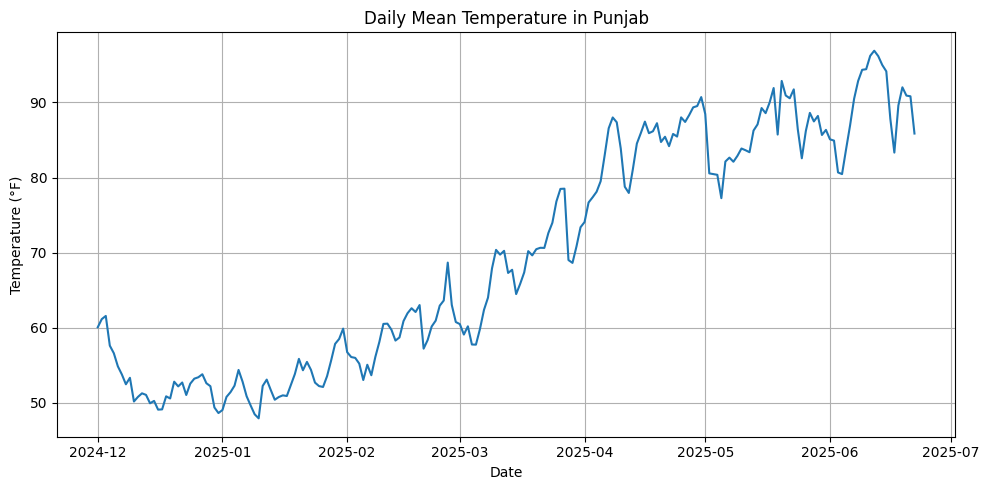

In [19]:
region_name = "Punjab"
region_weather = final_df[final_df["region"] == region_name]

plt.figure(figsize=(10, 5))
plt.plot(region_weather["date"], region_weather["temperature_2m_mean"], label="Mean Temp (°F)")
plt.title(f"Daily Mean Temperature in {region_name}")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.grid(True)
plt.tight_layout()
plt.show()

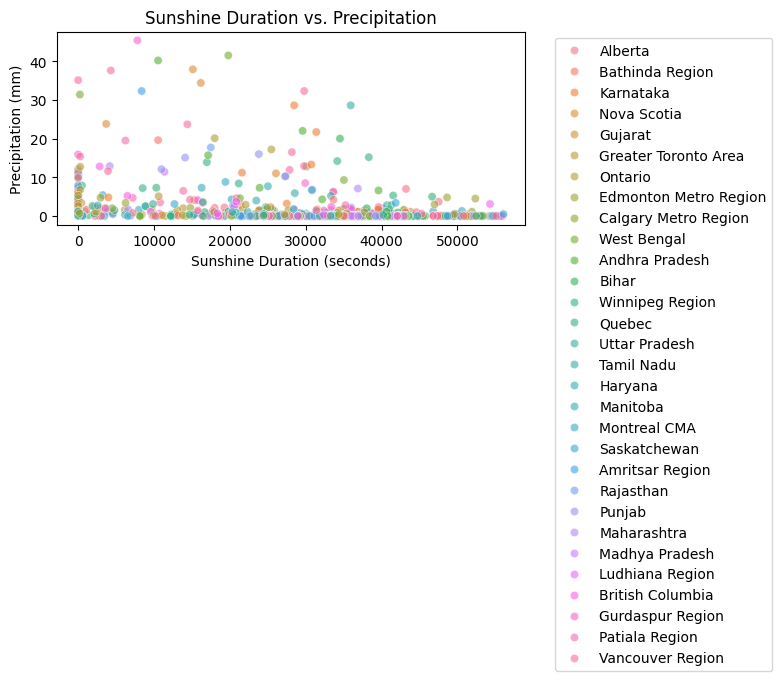

In [21]:
sample = final_df.sample(1000) 

plt.figure(figsize=(8, 5))
sns.scatterplot(data=sample, x="sunshine_duration", y="precipitation_sum", hue="region", alpha=0.6)
plt.title("Sunshine Duration vs. Precipitation")
plt.xlabel("Sunshine Duration (seconds)")
plt.ylabel("Precipitation (mm)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

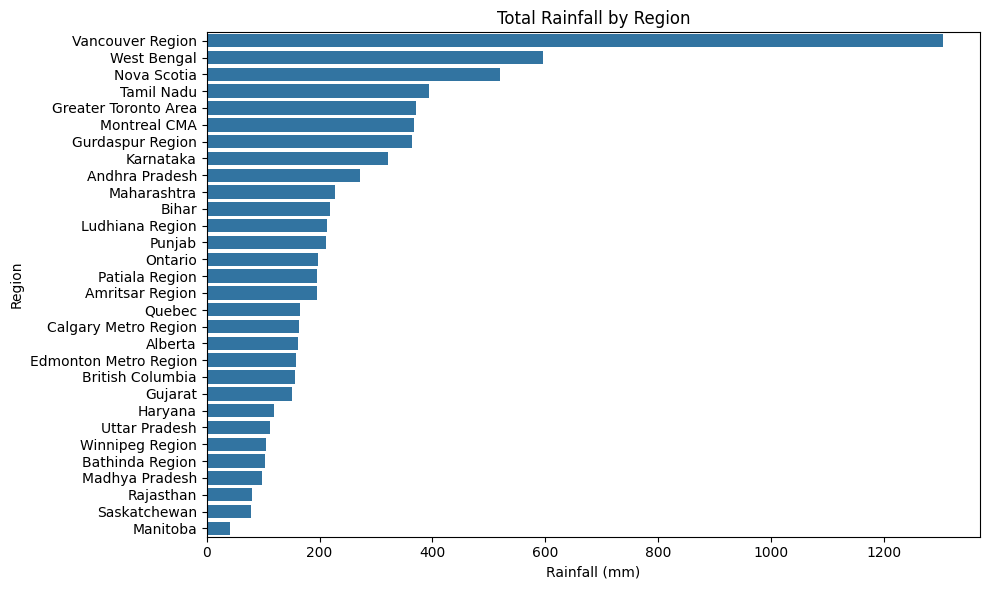

In [22]:
rain_by_region = final_df.groupby("region")["rain_sum"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=rain_by_region.values, y=rain_by_region.index)
plt.title("Total Rainfall by Region")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

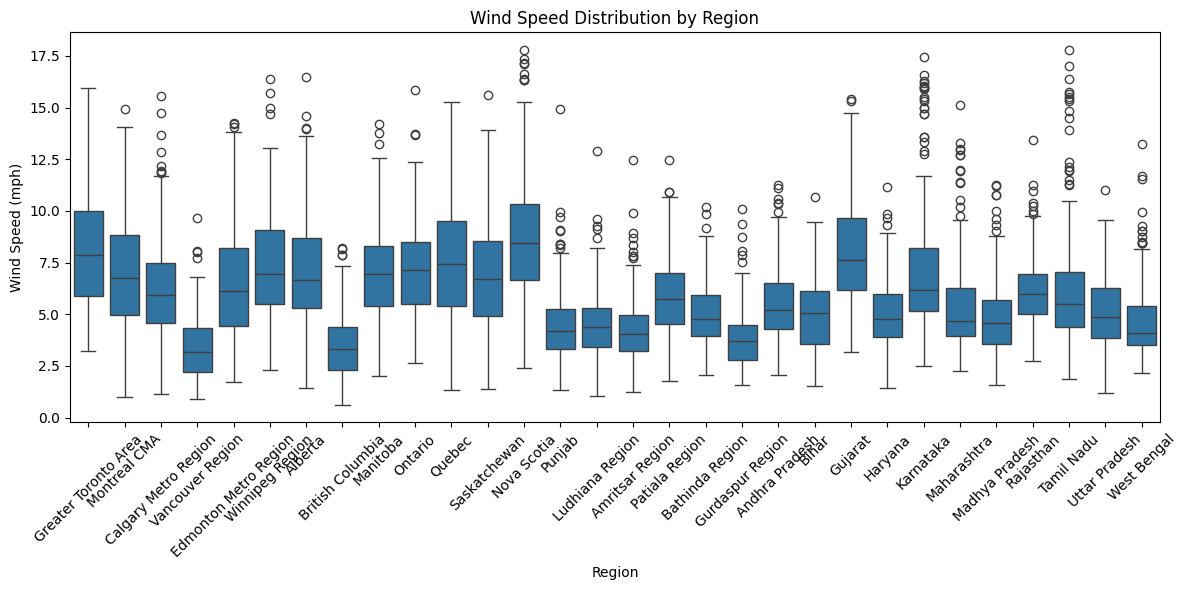

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_df, x="region", y="wind_speed_10m_mean")
plt.title("Wind Speed Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Wind Speed (mph)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()